In [1]:
#Importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, Normalizer
import seaborn as sns
import scipy.stats
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import silhouette_score
from sklearn_pandas import DataFrameMapper
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.decomposition import PCA

In [2]:
#load dataset
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Data Analyst/dataset

Mounted at /content/gdrive
/content/gdrive/MyDrive/Data Analyst/dataset


In [3]:
df = pd.read_csv('online_shoppers_intention.csv',encoding ='latin')

# Data Cleansing

In [4]:
#View data
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.shape

(12330, 18)

In [6]:
#check data summary
def summary(df):
    
    columns = df.columns.to_list()
    
    dtypes = []
    unique_counts = []
    missing_counts = []
    missing_percentages = []
    total_counts = [df.shape[0]] * len(columns)

    for col in columns:
        dtype = str(df[col].dtype)
        dtypes.append(dtype)
        unique_count = df[col].nunique()
        unique_counts.append(unique_count)
        missing_count = df[col].isnull().sum()
        missing_counts.append(missing_count)
        missing_percentage = round((missing_count/df.shape[0]) * 100, 2)
        missing_percentages.append(missing_percentage)

    df_summary = pd.DataFrame({
        "column": columns,
        "dtypes": dtypes,
        "unique_count": unique_counts,
        "missing_values": missing_counts,
        "missing_percentage": missing_percentages,
        "total_count": total_counts,
    })

    return df_summary.sort_values(by="missing_percentage", ascending=False).reset_index(drop=True)

summary(df)

,column,dtypes,unique_count,missing_values,missing_percentage,total_count
0,Administrative,int64,27,0,0.0,12330
1,Administrative_Duration,float64,3335,0,0.0,12330
2,Weekend,bool,2,0,0.0,12330
3,VisitorType,object,3,0,0.0,12330
4,TrafficType,int64,20,0,0.0,12330
5,Region,int64,9,0,0.0,12330
6,Browser,int64,13,0,0.0,12330
7,OperatingSystems,int64,8,0,0.0,12330
8,Month,object,10,0,0.0,12330
9,SpecialDay,float64,6,0,0.0,12330


## Drop Column

In [7]:
#drop unrelated variables
df = df.drop(columns=['SpecialDay', 'OperatingSystems','Browser', 'Region', 'TrafficType', 'VisitorType','Weekend', 'Month'])

## Data Outliers

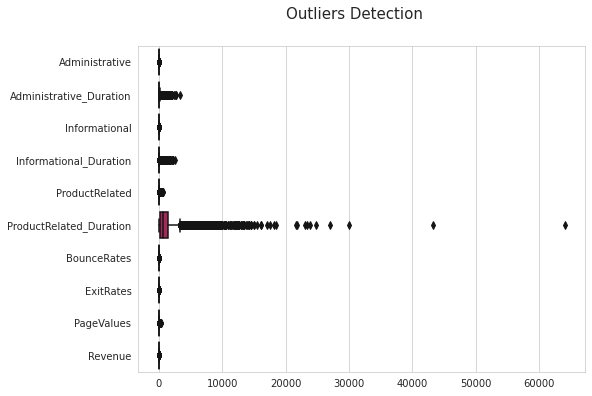

In [8]:
#check outliers
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
ax = sns.boxplot(data=df, orient="h", palette="rocket_r")

title_string = "Outliers Detection"

plt.suptitle(title_string, y = 0.97, fontsize = 15)
plt.show()

**Outlier Handling for Product Related Duration**

In [9]:
#handling ouliers with IQR Method
Q1= df['ProductRelated_Duration'].quantile(0.25)
Q3= df['ProductRelated_Duration'].quantile(0.75)
IQR=Q3-Q1

In [10]:
df['ProductRelated_Duration_Outlier']= False

In [11]:
for index, row in df.iterrows():
    if row['ProductRelated_Duration']>(Q1+1.5 * IQR):
        df.at[index,'ProductRelated_Duration_Outlier']= True

In [12]:
#Sum of oulier in dataset for Productrelated Duration variable
df['ProductRelated_Duration_Outlier'].sum()

1972

In [13]:
non_outliers=df.loc[df['ProductRelated_Duration_Outlier']==False]

**Outlier Handling for Administrative Duration**

In [14]:
Q1= non_outliers['Administrative_Duration'].quantile(0.25)
Q3= non_outliers['Administrative_Duration'].quantile(0.75)
IQR=Q3-Q1

In [15]:
non_outliers['Administrative_Duration_Outlier']= False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
for index, row in non_outliers.iterrows():
    if row['Administrative_Duration']>(Q1+1.5 * IQR):
        non_outliers.at[index,'Administrative_Duration_Outlier']= True

In [17]:
non_outliers['Administrative_Duration_Outlier'].sum()

1842

In [18]:
non_outliers2=non_outliers.loc[non_outliers['Administrative_Duration_Outlier']==False]

**Outlier Handling for Informational Duration**

In [19]:
Q1= non_outliers2['Informational_Duration'].quantile(0.25)
Q3= non_outliers2['Informational_Duration'].quantile(0.75)
IQR=Q3-Q1

In [20]:
non_outliers2['Informational_Duration_Outlier']= False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
for index, row in non_outliers2.iterrows():
    if row['Informational_Duration']>(Q1+1.5 * IQR):
        non_outliers2.at[index,'Informational_Duration_Outlier']= True

In [22]:
non_outliers2['Informational_Duration_Outlier'].sum()

895

In [23]:
non_outliers3=non_outliers2.loc[non_outliers2['Informational_Duration_Outlier']==False]

In [24]:
#delete outliers detection column
non_outliers3 = non_outliers3.drop(columns=['ProductRelated_Duration_Outlier','Administrative_Duration_Outlier','Informational_Duration_Outlier'])


## Handling Data Imbalance

In [25]:
X = non_outliers3.drop('Revenue',axis='columns')
y = non_outliers3['Revenue']

In [26]:
under = RandomUnderSampler(sampling_strategy=1)                    
X, y = under.fit_resample(X, y)

# PCA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


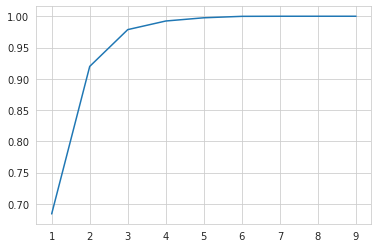

In [27]:
#Scaling/transforming data
norm = Normalizer()
X_norm = norm.fit_transform(X)

pca = PCA(n_components=9)
pca.fit(X_norm)
sns.lineplot(range(1,10),pca.explained_variance_ratio_.cumsum())

In [28]:
pca = PCA(n_components=2)
X_new = pd.DataFrame(pca.fit_transform(X_norm))
X_new

,0,1
0,1.257648,-0.273508
1,-0.118242,-0.055186
2,-0.123751,-0.051868
3,1.257648,-0.273508
4,-0.077611,-0.078282
...,...,...
1719,-0.101572,-0.013116
1720,-0.127617,-0.049222
1721,-0.108319,-0.055509
1722,-0.121467,-0.051952


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


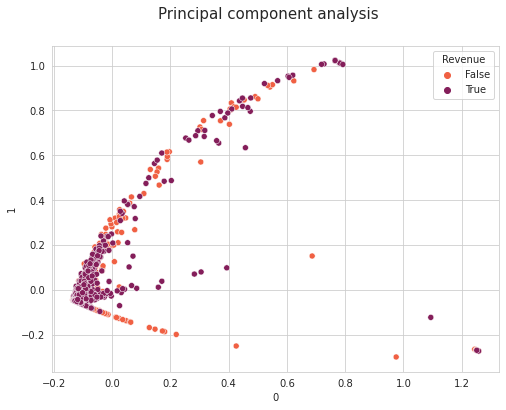

In [29]:
#Visualizing PCA
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.scatterplot(X_new[0],X_new[1], hue = y, palette="rocket_r")

title_string = "Principal component analysis"

plt.suptitle(title_string, y = 0.97, fontsize = 15)
plt.show()

# K-means

## Elbow Method

<Figure size 432x288 with 0 Axes>

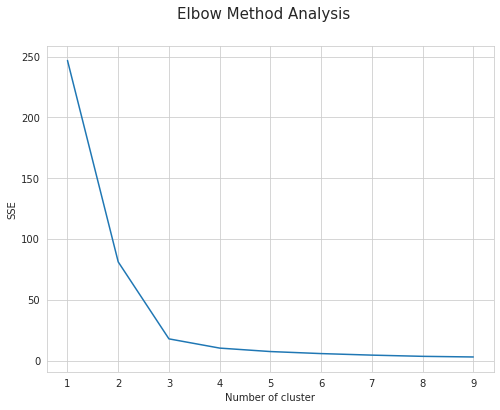

In [30]:
#Elbow Method
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_new)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.figure(figsize=(8,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
title_string = "Elbow Method Analysis"
plt.suptitle(title_string, y = 0.97, fontsize = 15)
plt.show()

## Silhouette Method

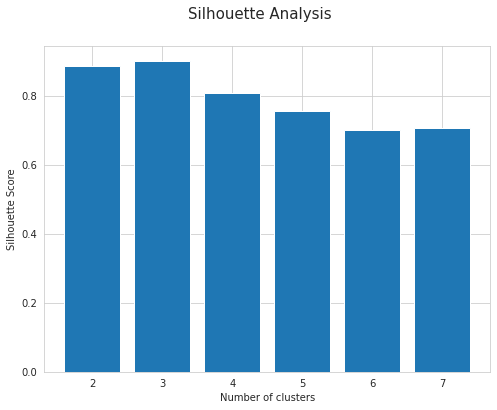

In [31]:
#silhouette analysis
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_new, KMeans(n_clusters = n_cluster).fit_predict(X_new))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.figure(figsize=(8,6))
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
title_string = "Silhouette Analysis"
plt.suptitle(title_string, y = 0.97, fontsize = 15)
plt.show() 

In [32]:
kmeans = KMeans(n_clusters=3)
kmeans

KMeans(n_clusters=3)

In [33]:
y_predicted = kmeans.fit_predict(X_new[[0,1]])
y_predicted

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [34]:
#add cluster in dataset
X['cluster'] = y_predicted
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,cluster
0,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,1
1,0,0.000000,0,0.0,18,623.725000,0.016667,0.055397,0.000000,0
2,0,0.000000,0,0.0,5,249.000000,0.000000,0.040000,0.000000,0
3,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,1
4,0,0.000000,0,0.0,20,219.333333,0.000000,0.011667,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
1719,5,40.136364,0,0.0,35,840.995292,0.005263,0.012594,64.722389,0
1720,0,0.000000,0,0.0,14,999.000000,0.000000,0.023077,8.482952,0
1721,0,0.000000,0,0.0,36,872.833333,0.000000,0.007059,81.027296,0
1722,0,0.000000,0,0.0,24,1010.250000,0.008333,0.016667,31.819677,0


## Clustering Output

In [35]:
#cluster analysis in pivot table 
table = pd.pivot_table(X, values=['ProductRelated','ProductRelated_Duration','Administrative','Administrative_Duration','Informational','Informational_Duration',
                                  'BounceRates','ExitRates','PageValues'],
                       index=['cluster'],
                       aggfunc={'ProductRelated':np.median,
                                'ProductRelated_Duration':np.median,
                                'Administrative':np.median,
                                'Administrative_Duration':np.median,
                                'Informational':np.median,
                                'Informational_Duration':np.median,
                                'BounceRates':np.median,
                                'ExitRates':np.median,
                                'PageValues':np.median,})
table

,Administrative,Administrative_Duration,BounceRates,ExitRates,Informational,Informational_Duration,PageValues,ProductRelated,ProductRelated_Duration
cluster,,,,,,,,,
0,0,0.0,0.0,0.022222,0,0.0,0.0,16,541.705357
1,0,0.0,0.2,0.200000,0,0.0,0.0,1,0.000000
2,3,56.8,0.0,0.033333,0,0.0,0.0,3,27.200000


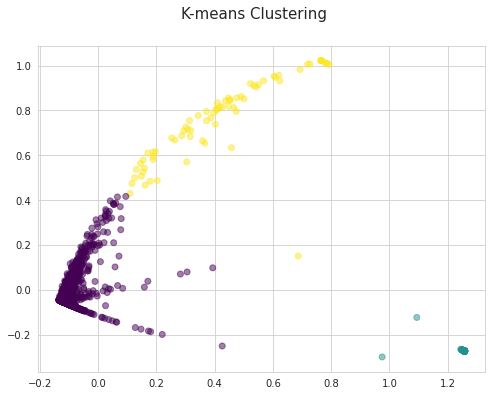

<Figure size 432x288 with 0 Axes>

In [48]:
# Visualizing the clustering 
plt.figure(figsize=(8,6))
plt.scatter(X_new[0], X_new[1],  
           c = KMeans(n_clusters = 3).fit_predict(X_new), cmap ='viridis', alpha=0.5)
title_string = "K-means Clustering"
plt.suptitle(title_string, y = 0.97, fontsize = 15) 
plt.show() 